<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><span><a href="#Признаки" data-toc-modified-id="Признаки-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Признаки</a></span></li><li><span><a href="#Целевой-признак" data-toc-modified-id="Целевой-признак-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Целевой признак</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_auc_score
from sklearn.metrics import roc_curve 


In [2]:
df = pd.read_csv('../data/Churn.csv')

# Приведение наименований столбцов к нижнему регистру и змениному стилю:
df.columns = map(str.lower, df.columns)
df.rename(
    columns={'rownumber': 'row_number','customerid': 'customer_id', 'creditscore': 'credit_score',
    'numofproducts': 'num_of_products', 'hascrcard': 'has_cr_card', 
    'isactivemember': 'is_active_member', 'estimatedsalary': 'estimated_salary'}, inplace=True
)
# display(df)

### Описание данных

**Признаки**

•	row_number — индекс строки в данных

•	customer_id — уникальный идентификатор клиента

•	surname — фамилия

•	credit_score — кредитный рейтинг

•	geography — страна проживания

•	gender — пол

•	age — возраст

•	tenure — сколько лет человек является клиентом банка

•	balance — баланс на счёте

•	num_of_products — количество продуктов банка, используемых клиентом

•	has_cr_card — наличие кредитной карты

•	is_active_member — активность клиента

•	estimated_salary — предполагаемая зарплата

**Целевой признак**

•	exited — факт ухода клиента


#### Признаки

In [3]:
# print('Уникальных значений по признакам:')
# display(pd.DataFrame(df.nunique()))
#
# display(df.select_dtypes(exclude=[np.number]). head())
# print(df['surname'].value_counts())
# print(df['geography'].value_counts())
# print(df['gender'].value_counts())

In [4]:
# display(df[df.isnull().any(1)])
# print(df['exited'].value_counts())
# df = df.dropna()
# display(df)
# print(df['exited'].value_counts())

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Удалено 9,09% данных

In [39]:
print(df.isna().sum())
grp = df.groupby(['geography', 'age'])
# grp = df.groupby(['geography'])
# grp = df.groupby(['age'])
display(grp.aggregate(np.sum))
df['tenure'] = grp.tenure.apply(lambda x: x.fillna(x.median()))
print(df.isna().sum())
display(df.loc[29:60])
df.shape

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64


credit_score  tenure     balance  num_of_products  has_cr_card  \
geography age                                                                   
France    18           7367    64.0   907078.66               16            8   
          19           7486    56.0   607928.99               17            9   
          20          14157   101.0  1326811.02               32           12   
          21          19914   157.0  2202319.06               53           21   
          22          28227   242.0  2914156.77               69           33   
...                     ...     ...         ...              ...          ...   
Spain     77           1434    10.0   149083.70                2            2   
          78           1314     4.0   151675.65                3            0   
          79            712     5.0   108078.56                1            1   
          80            809     8.0        0.00                2            0   
          88            513    10.0        0.00                2            1   

               is_active_member  estimated_salary  exited  
geography age                                              
France    18                  7         886381.11       1  
          19                  7         836251.65       0  
          20                 10        2142428.36       0  
          21                 19        3015325.70       1  
          22                 26        4528260.98       6  
...                         ...               ...     ...  
Spain     77                  2         224849.75       0  
          78                  2         238414.05       0  
          79                  1         174118.93       0  
          80                  1          34164.05       0  
          88                  1          52952.24       0  

[196 rows x 8 columns]

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
29,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0
30,591,Spain,Female,39,6.0,0.00,3,1,0,140469.38,1
31,533,France,Male,36,7.0,85311.70,1,0,1,156731.91,0
32,553,Germany,Male,41,9.0,110112.54,2,0,0,81898.81,0
33,520,Spain,Female,42,6.0,0.00,2,1,1,34410.55,0
34,722,Spain,Female,29,9.0,0.00,2,1,1,142033.07,0
35,475,France,Female,45,0.0,134264.04,1,1,0,27822.99,1
36,490,Spain,Male,31,3.0,145260.23,1,0,1,114066.77,0
37,804,Spain,Male,33,7.0,76548.60,1,0,1,98453.45,0
38,850,France,Male,36,7.0,0.00,1,1,1,40812.90,0


(10000, 11)

In [6]:
df.drop(columns=['row_number', 'customer_id', 'surname'], axis=1, inplace=True)

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">
<h5> Комментарий студента </h5>
    
- 'row_number', 'customer_id' - порядковые типы данных, их значения уникальны.

- 'surname' - номинальный тип

- все три признака  не коррелируют с целевым признаком.

</div>


Данные содержат категориальные признаки (**'surname'**, **'geography'**, **'gender'**).
Необходимо преобразование категориальных признаков в численные с помощью OHE (One-Hot Encoding - техника прямого кодирования, или отображения)

In [7]:
# преобразование категориальных признаков в численные с помощью One-Hot Encoding
df_ohe = pd.get_dummies(df, drop_first=False)
# display(df_ohe.head(3))

In [8]:
# target = df_ohe['exited']
# features = df_ohe.drop('exited', axis=1)

# features_train, features_valid, target_train, target_valid = train_test_split(
#     features, target, test_size=0.199978, random_state=12345)

# features_train, features_test, target_train, target_test = train_test_split(features_train, target_train, test_size=0.249965626, random_state=12345) 
# display(features_train, features_valid, features_test)

#  # обучение логистической регресии
# model = LogisticRegression(random_state=12345, solver='liblinear')
# model.fit(features_train, target_train) # обучение модели на тренировочной выборке

In [9]:
def make_target_features(data, target_column='exited'):
    target = data[target_column]
    features = data.drop(target_column, axis=1)
    return target, features

rand_state = 12345
def split_scal_data(features, target):
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.199978, random_state=rand_state)

    features_train, features_test, target_train, target_test = train_test_split(
        features_train, target_train, test_size=0.249965626, random_state=rand_state, shuffle=False)
     # Масштабирование численных признаков методом стандартизации данных
    numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric]) 

    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric]) 
    features_test[numeric] = scaler.transform(features_test[numeric])
    return features_train, features_valid, features_test, target_train, target_valid, target_test


In [10]:
target, features = make_target_features(df_ohe, target_column='exited')

features_train, features_valid, features_test, target_train, target_valid, target_test = split_scal_data(
    features, target
)


display(features_train.head(3), features_train.shape, features_valid.head(3),
        features_valid.shape, features_test.head(3), features_test.shape
)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
454,1.106233,0.024139,0.367523,0.827373,-0.903118,0,1,-0.771197,1,0,0,1,0
8307,-0.333797,-0.837381,-0.716260,0.931047,-0.903118,1,1,-1.206655,1,0,0,0,1
4811,-0.776092,-1.220279,0.728784,-1.208208,0.820938,1,0,0.196438,0,0,1,1,0


(6000, 13)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
7867,-0.107507,0.694210,-0.716260,-1.208208,-0.903118,1,1,0.953384,0,0,1,1,0
1402,1.095947,-0.933106,1.090044,0.874503,-0.903118,1,0,-0.409746,1,0,0,0,1
8606,1.610244,0.311312,0.006262,-1.208208,0.820938,1,1,-0.454182,0,0,1,0,1


(2000, 13)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
3417,-0.395513,0.311312,1.812566,-0.001518,-0.903118,0,0,0.839592,1,0,0,1,0
2581,0.550793,-0.741657,0.006262,-1.208208,0.820938,1,0,1.416664,1,0,0,0,1
7574,1.013660,-0.550208,-1.438782,-0.019284,-0.903118,1,0,-1.401157,1,0,0,1,0


(2000, 13)

#### Целевой признак

In [11]:
# создание пустой модели и сохранение её в переменной структуры данных DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=rand_state)
# обучение модели 
model.fit(features_train, target_train)
# расчёт предсказания ответов на обучающей выборке 
predicted_valid = model.predict(features_valid)

accuracy_valid = accuracy_score(target_valid, predicted_valid)
print(accuracy_valid) 

0.799


0    0.7975
1    0.2025
dtype: float64


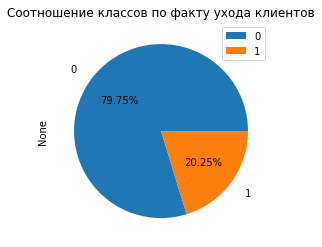

In [12]:
# для работы функции value_counts(),преобразуем результат к pd.Series 
predicted_valid = pd.Series(model.predict(features_valid))

# анализ частоты классов в результатах предсказаний решающего дерева 
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)

class_frequency.plot.pie(legend=True, labeldistance=1.2, autopct='%1.2f%%', figsize=(4,4), 
                title='Соотношение классов по факту ухода клиентов'
)
plt.show()

# df['exited'].value_counts().plot(kind='pie', utopct='%1.2f%%', legend=True)

In [13]:
#  # Масштабирование численных признаков методом стандартизации данных
# numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
# scaler = StandardScaler()
# scaler.fit(features_train[numeric]) 

# features_train[numeric] = scaler.transform(features_train[numeric])
# features_valid[numeric] = scaler.transform(features_valid[numeric]) 
# features_test[numeric] = scaler.transform(features_valid[numeric]) 

# display(features_train.head())

In [14]:
def train_and_predict(model, samplefunc=None, test=False, repeat=None):
    # target, features = make_target_features(data)
    # features_train, features_valid, features_test, target_train, target_valid, target_test = split_scal_data(data,
    #     features, target=target)

    global features_train, target_train
    features = features_train
    target = target_train

    if samplefunc:
        features, target = samplefunc(repeat)

    
    model.fit(features, target)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    if test:
        predictions_test = model.predict(features_test)
        f1 = f1_score(target_test, predictions_test)
        return f1
    
    return f1

## Исследование задачи

Пороверка на адекватность. 

In [15]:
# Создание константной модели: любому объекту она прогнозирует класс «0».
target_pred_constant = pd.Series(0, index=target.index)

print('Доля правильных ответов = ', accuracy_score(target, target_pred_constant)) 

Доля правильных ответов =  0.7963


In [16]:
# Матрица ошибок
print(confusion_matrix(target_valid, predicted_valid))

[[1383  190]
 [ 212  215]]


TN (1268) — это количество клиентов, которые:
•	по прогнозу модели  не прекратили сотрудничество с банком;
•	по факту не ушли из банка.

TP (185) — это количество клиентов, которые:
•	по прогнозу модели прекратили сотрудничество с банком;
•	по факту ушли из банка.


FP (181) — это количество клиентов, которые:
•	по прогнозу модели  прекратили сотрудничество с банком;
•	по факту не ушли из банка.

FN (184) — это количество клиентов, которые:
•	по прогнозу модели  не прекратили сотрудничество с банком;
•	по факту ушли из банка.

Чтобы не пересчитывать каждую метрику отдельно, можно использовать classification_report(),  завернув в ДататаФрэйм (pd.DataFrame() и транспонировать (transpose()):

In [17]:
print('Полнота: ', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))
print('F1-мера: ', f1_score(target_valid, predicted_valid))

Полнота:  0.5035128805620609
Точность: 0.5308641975308642
F1-мера:  0.5168269230769231


In [18]:
pd.DataFrame(classification_report(target_valid, predicted_valid, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.867085,0.879212,0.873106,1573.000
1,0.530864,0.503513,0.516827,427.000
accuracy,0.799000,0.799000,0.799000,0.799
macro avg,0.698974,0.691362,0.694966,2000.000
weighted avg,0.795302,0.799000,0.797040,2000.000


#### LogisticRegression

In [19]:
model = LogisticRegression(solver='liblinear', random_state=rand_state)
f1 = train_and_predict(model, samplefunc=None, test=False)

print('_______________________________________________')
print(f'F1_valid: {f1}')

_______________________________________________
F1_valid: 0.2785714285714286


#### DecisionTreeClassifier

In [20]:
def desision_tree_depth(class_weight=None, samplefunc=None, repeat=None):
    best_model = None
    best_depth = 0
    best_result = 0
    for max_depth in range(2, 20):
        model = DecisionTreeClassifier(
            
            class_weight=class_weight,
            max_depth=max_depth, 
            random_state=rand_state
            )
        
        result = train_and_predict(
            model, 
            samplefunc=samplefunc, 
            repeat=repeat
            )
        
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = max_depth
        print(f'max_depth {max_depth}:\t F1_valid: {result}')
    return best_result, best_depth

best_result, best_depth = desision_tree_depth()
print('_______________________________________________')
print(f'The best of F1_valid: {best_result}, depth - {best_depth}')

max_depth 2:	 F1_valid: 0.5272969374167776
max_depth 3:	 F1_valid: 0.4113475177304965
max_depth 4:	 F1_valid: 0.42807017543859643
max_depth 5:	 F1_valid: 0.5625000000000001
max_depth 6:	 F1_valid: 0.5088
max_depth 7:	 F1_valid: 0.5634218289085545
max_depth 8:	 F1_valid: 0.5475177304964539
max_depth 9:	 F1_valid: 0.5492371705963939
max_depth 10:	 F1_valid: 0.5506849315068494
max_depth 11:	 F1_valid: 0.5258855585831063
max_depth 12:	 F1_valid: 0.5342281879194631
max_depth 13:	 F1_valid: 0.5263157894736842
max_depth 14:	 F1_valid: 0.524547803617571
max_depth 15:	 F1_valid: 0.5270935960591132
max_depth 16:	 F1_valid: 0.5256723716381418
max_depth 17:	 F1_valid: 0.5067650676506765
max_depth 18:	 F1_valid: 0.5128834355828221
max_depth 19:	 F1_valid: 0.512696493349456
_______________________________________________
The best of F1_valid: 0.5634218289085545, depth - 7


#### RandomForestClassifier

In [21]:
def random_f_estimate(max_depth, class_weight=None, samplefunc=None, repeat=None):    

    best_n_estimators = 0
    best_result = 0
    for est in range(2, 40, 1):
        model = RandomForestClassifier(
            
            class_weight=class_weight,
            n_estimators=est,
            max_depth=max_depth,
            random_state=rand_state,
            n_jobs=8
            
        )
        result = train_and_predict(model,samplefunc=samplefunc, repeat=repeat)
        if result > best_result:
            best_result = result
            best_n_estimators = est
    
    return best_result, best_n_estimators


best_result = 0
result = 0
best_depth = 0
best_n_estimate = 0
for max_depth in range(2, 15, 2):
    result, best_n_est = random_f_estimate(max_depth)
    if result > best_result:
        best_result = result
        best_depth = max_depth
        best_n_estimate =  best_n_est        
        
    print(f'F1_valid: {result}, n_estimators - {best_n_est}  depth: {max_depth}' )
print('_______________________________________________')
print(f'The best of F1_valid: {best_result}, n_estimators - {best_n_estimate} best depth: {best_depth}')    

F1_valid: 0.11868131868131869, n_estimators - 31  depth: 2
F1_valid: 0.2840466926070039, n_estimators - 37  depth: 4
F1_valid: 0.46405228758169936, n_estimators - 7  depth: 6
F1_valid: 0.48366013071895425, n_estimators - 17  depth: 8
F1_valid: 0.5255023183925811, n_estimators - 6  depth: 10
F1_valid: 0.5300462249614791, n_estimators - 21  depth: 12
F1_valid: 0.5384615384615384, n_estimators - 35  depth: 14
_______________________________________________
The best of F1_valid: 0.5384615384615384, n_estimators - 35 best depth: 14


F1_valid: 0.32653061224489793

The best of F1_valid: 0.6040061633281972, depth - 7  - ***Лучший результат принадлежит Дереву решений ***

F1_valid: 0.570446735395189, n_estimators - 33  depth: 14

## Борьба с дисбалансом

#### LogisticRegression

In [22]:
# Балансировка весов классов
model = LogisticRegression(class_weight="balanced", random_state=rand_state, solver='liblinear')
f1_balanced = train_and_predict(model, samplefunc=None, test=False)
print(f'F1_valid_balanced: {f1_balanced}')

F1_valid_balanced: 0.5033557046979866


Балансировка весов классов  дала ощутимые результаты, модель улучшилась  c 
F1-мера увеличилась с 0.33 до 0.51

#### DecisionTreeClassifier

In [23]:
best_result, best_depth = desision_tree_depth(class_weight='balanced')
print('_______________________________________________')
print(f'The best of F1_valid_balanced: {best_result}, depth - {best_depth}')

max_depth 2:	 F1_valid: 0.5405887600356825
max_depth 3:	 F1_valid: 0.5405887600356825
max_depth 4:	 F1_valid: 0.5953237410071942
max_depth 5:	 F1_valid: 0.5819158460161146
max_depth 6:	 F1_valid: 0.5960264900662251
max_depth 7:	 F1_valid: 0.572463768115942
max_depth 8:	 F1_valid: 0.5731108930323847
max_depth 9:	 F1_valid: 0.5691854759568203
max_depth 10:	 F1_valid: 0.5251509054325956
max_depth 11:	 F1_valid: 0.5245245245245245
max_depth 12:	 F1_valid: 0.5046923879040668
max_depth 13:	 F1_valid: 0.5027442371020856
max_depth 14:	 F1_valid: 0.5
max_depth 15:	 F1_valid: 0.48842592592592593
max_depth 16:	 F1_valid: 0.48584905660377364
max_depth 17:	 F1_valid: 0.4964200477326969
max_depth 18:	 F1_valid: 0.48216482164821645
max_depth 19:	 F1_valid: 0.48019801980198024
_______________________________________________
The best of F1_valid_balanced: 0.5960264900662251, depth - 6


Качество модели ухудшилось:

 The best of F1_valid: 0.59, depth - 8 
 
 The best of F1_valid_balanced: 0.57, depth - 6

#### RandomForestClassifier

In [24]:
best_result = 0
result = 0
best_depth = 0
best_n_estimate = 0
for max_depth in range(2, 20, 8):
    result, best_n_est = random_f_estimate(max_depth, class_weight='balanced')
    if result > best_result:
        best_result = result
        best_depth = max_depth
        best_n_estimate =  best_n_est        
        
    print(f'F1_valid: {result}, n_estimators - {best_n_est}  depth: {max_depth}' )
print('_______________________________________________')
print(f'The best of F1_valid_balanced: {best_result}, n_estimators - {best_n_estimate} best depth: {best_depth}') 

F1_valid: 0.5752212389380531, n_estimators - 13  depth: 2
F1_valid: 0.6389548693586699, n_estimators - 18  depth: 10
F1_valid: 0.5435435435435435, n_estimators - 27  depth: 18
_______________________________________________
The best of F1_valid_balanced: 0.6389548693586699, n_estimators - 18 best depth: 10


Лучшая модель при балансировке классов - RandomForestClassifier с результатами : 

F1_valid_balanced: 0.6151724137931034, 

n_estimators - 37 

best depth: 10

### Увеличение выборки
Выполняется в четыре этапа:

•	Разделить обучающую выборку на отрицательные и положительные объекты;

•	Скопировать несколько раз положительные объекты;

•	С учётом полученных данных создать новую обучающую выборку;

•	Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.


Объектов для положительного класса явно не достаточно. Продублируем объекты положительного класса и объединим их с объектами отрицательного класса.(повышающая дискретизация)

In [25]:
# Создание новой обучающей выборки(увеличение класса "1" и перемешивание)
def upsample(repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_upsampled = pd.concat(
        [features_zeros] + [features_ones] * repeat
    )
    target_upsampled = pd.concat(
        [target_zeros] + [target_ones] * repeat
    )
# перемешивание
    features_upsampled = shuffle(
        features_upsampled, random_state=rand_state
    )
    target_upsampled = shuffle(
        target_upsampled, random_state=rand_state
    )
    return features_upsampled, target_upsampled

#features_upsampled, target_upsampled = upsample(3)

print(features_train.shape)
print(target_train.shape)

# print(features_upsampled.shape)
# print(target_upsampled.shape)

(6000, 13)
(6000,)


#### LogisticRegression

In [26]:
# Обучение  модели LogisticRegression на новых данных
model = LogisticRegression(solver='liblinear', random_state=rand_state)

f1_upsample = train_and_predict(model, samplefunc=upsample, repeat=3)

print(f'F1_valid_upsample: {f1_upsample}')

F1_valid_upsample: 0.5


#### DecisionTreeClassifier

In [27]:
best_result, best_depth = desision_tree_depth(samplefunc=upsample, repeat=2)
print('_______________________________________________')
print(f'The best of F1_upsample: {best_result}, depth - {best_depth}')

max_depth 2:	 F1_valid: 0.5225225225225224
max_depth 3:	 F1_valid: 0.5443037974683544
max_depth 4:	 F1_valid: 0.5099150141643061
max_depth 5:	 F1_valid: 0.5949535192563081
max_depth 6:	 F1_valid: 0.5899280575539568
max_depth 7:	 F1_valid: 0.6063569682151589
max_depth 8:	 F1_valid: 0.5794621026894865
max_depth 9:	 F1_valid: 0.5529841656516443
max_depth 10:	 F1_valid: 0.5448028673835126
max_depth 11:	 F1_valid: 0.5200945626477541
max_depth 12:	 F1_valid: 0.49748743718592964
max_depth 13:	 F1_valid: 0.509090909090909
max_depth 14:	 F1_valid: 0.4830097087378641
max_depth 15:	 F1_valid: 0.4656862745098039
max_depth 16:	 F1_valid: 0.4691358024691358
max_depth 17:	 F1_valid: 0.4796044499381953
max_depth 18:	 F1_valid: 0.48216482164821645
max_depth 19:	 F1_valid: 0.4844720496894411
_______________________________________________
The best of F1_upsample: 0.6063569682151589, depth - 7


#### RandomForestClassifier

In [28]:
best_result = 0
result = 0
best_depth = 0
best_n_estimate = 0
for max_depth in range(4, 11):
    result, best_n_est = random_f_estimate(
        max_depth,
        samplefunc=upsample,
        repeat=3
    )
    if result > best_result:
        best_result = result
        best_depth = max_depth
        best_n_estimate =  best_n_est        
        
    print(f'F1_valid: {result}, n_estimators - {best_n_est}  depth: {max_depth}' )
print('_______________________________________________')
print(f'The best of F1_valid_upsample: {best_result}, n_estimators - {best_n_estimate} best depth: {best_depth}') 

F1_valid: 0.6016451233842538, n_estimators - 23  depth: 4
F1_valid: 0.6189889025893958, n_estimators - 17  depth: 5
F1_valid: 0.6292397660818715, n_estimators - 29  depth: 6
F1_valid: 0.6343713956170703, n_estimators - 30  depth: 7
F1_valid: 0.634088200238379, n_estimators - 33  depth: 8
F1_valid: 0.637749120750293, n_estimators - 24  depth: 9
F1_valid: 0.6365853658536585, n_estimators - 33  depth: 10
_______________________________________________
The best of F1_valid_upsample: 0.637749120750293, n_estimators - 24 best depth: 9


F1_valid_upsample: 0.5174353205849268

The best of F1_upsample: 0.6167741935483871, depth - 8

The best of F1_valid_upsample: 0.6339522546419099, n_estimators - 34 best depth: 5  - **Лучшая модель при увеличении выборки**



**Общий вывод**

*При увеличении выборки лучшим оказался алгоритм классификации
Рандомный лес с F1-мерой = 0,63  с количеством деревьев = 34 и глубиной = 7.*

In [29]:
# result, best_n_est = random_f_estimate(
#         max_depth=7,
#         samplefunc=upsample,
#         repeat=3
#     )
# print(result)

## Тестирование модели

In [35]:
# model = RandomForestClassifier(            
#             class_weight='balanced',
#             n_estimators=19,
#             max_depth=7,
#             random_state=rand_state,                                  
#         )

# model.fit(features_upsampled, target_upsampled)
# predicted_test = model.predict(features_test)
# result = train_and_predict(df_ohe, model, test=True)

# print(result)



# target, features = make_target_features(df_ohe)
# features_train, features_valid, features_test, target_train, target_valid, target_test = split_scal_data(data=df_ohe, features=features, target=target)
# # display(features_train, features_valid, features_test, target_train, target_valid, target_test)

model = RandomForestClassifier(n_estimators=24, max_depth=9, random_state=rand_state)
features_upsampled, target_upsampled = upsample(3)
model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(features_valid)
print('valid:', f1_score(target_valid, predicted_valid))

predicted_test = model.predict(features_test)
print('test:', f1_score(target_test, predicted_test))

valid: 0.637749120750293
test: 0.6456876456876456


In [36]:
# значения вероятностей классов
probabilities_valid = model.predict_proba(features_valid)
# значения вероятностей класса «1»
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid)

0.8568450923145409

grp = df.groupby(['geography', 'age']) :

The best of F1_valid_upsample: 0.637749120750293, n_estimators - 24 best depth: 9

valid: 0.637749120750293
test: 0.6456876456876456
roc_auc_score: 0.8568450923145409
__________________________________________________________________________________
grp_geogr = df.groupby(['geography']):

The best of F1_valid_upsample: 0.6378504672897197, n_estimators - 39 best depth: 8
valid: 0.6378504672897197
test: 0.649592549476135
roc_auc_score: 0.862827932127485

___________________________________________________________________________________
grp_age = df.groupby(['age']):

The best of F1_valid_upsample: 0.6375143843498273, n_estimators - 39 best depth: 6

valid: 0.6375143843498273
test: 0.6527293844367015
roc_auc_score: 0.8633981517737106

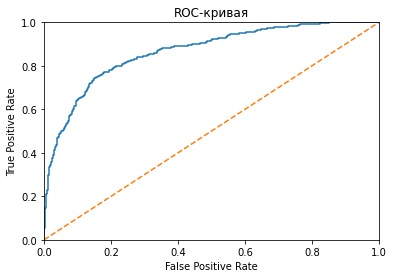

In [32]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # < напишите код здесь >

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()




Метрика лучше, чем у случайной модели, но до идеального значения (AUC-ROC = 1) очень далеко. Кривая ошибок выше случайной прямой, но незначительно. 

### Уменьшение выборки

In [33]:
# def downsample(features, target, fraction):
#     features_zeros = features_train[target_train == 0]
#     features_ones = features_train[target_train == 1]
#     target_zeros = target_train[target_train == 0]
#     target_ones = target_train[target_train == 1]

#     features_downsampled = pd.concat(
#         [features_zeros.sample(frac=fraction, 
#                                random_state=rand_state
#                               )] + [features_ones]
#     )
#     target_downsampled = pd.concat(
#         [target_zeros.sample(frac=fraction, 
#                              random_state=rand_state
#                             )] + [target_ones]
#     )

# # перемешивание
#     features_downsampled, target_downsampled = shuffle(
#         features_downsampled, target_downsampled,
#         random_state=rand_state
#     )
    
#     return features_downsampled, target_downsampled

# features_downsampled, target_downsampled = downsample(features_train, target_train, 0.2)

# print(features_downsampled.shape)
# print(target_downsampled.shape)

**Полнота** (Recall) — это доля TP-ответов среди всех, у которых истинная метка 1(TP + FN). Хорошо, когда значение recall близко к единице: модель хорошо ищет положительные объекты. Если ближе к нулю — модель надо перепроверить и починить. Полнота выявляет, какую долю положительных среди всех ответов выделила модель. Обычно они на вес золота, и важно понимать, как хорошо модель их находит.


**Точность** (Precission) определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность. Это доля  TP-ответов среди всех, у которых истинная метка 0(TP + FP).

Если в задаче ключевая метрика — полнота, как сделать её максимально высокой? - Обучитm модель, которая отвечает «1» на все объекты. Полнота будет равна 1.0.

Важны обе метрики. Контролировать их параллельно помогают агрегирующие метрики, одна из которых — **F1-мера** (англ. F1-score). ***Это среднее гармоническое полноты и точности***. Единица в F1 означает, что соотношение полноты и точности равно 1:1.

Граница, где заканчивается отрицательный класс и начинается положительный, называется **порогом** (англ. threshold). По умолчанию он равен 0.5, но что если его поменять?  Eсли уменьшить порог,•	Точность уменьшится, а полнота увеличится
Среди ответов будет больше положительных (1). Наоборот, увеличивая пороговую вероятность, мы увеличиваем точность, но снижаем полноту.
 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*